In [1]:
pip install pandas as pd 


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
pip install numpy as np 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [1]:
# 1. Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


C:\Users\Mrunali\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Mrunali\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Mrunali\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# 2. Load data
# Replace with your actual file path
df = pd.read_csv("C:/Users/Mrunali/Downloads/RTA Dataset.csv/RTA Dataset.csv")

# Quick look
print(df.head())
print(df.info())
print(df['Accident_severity'].value_counts())


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [7]:
# 3. Basic cleaning (example – adjust columns to your dataset)
# Drop rows with missing target
df = df.dropna(subset=['Accident_severity'])

# Optionally drop obvious ID columns
drop_cols = ['Accident_ID', 'Vehicle_ID']  # change to your IDs if they exist
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

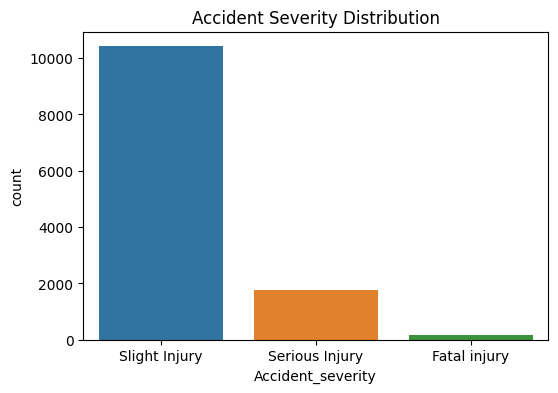

In [8]:
# 4. EDA examples

# Severity distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Accident_severity', order=df['Accident_severity'].value_counts().index)
plt.title('Accident Severity Distribution')
plt.show()

# Severity vs. time of day (assuming 'Time_of_Day' column)
if 'Time_of_Day' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Time_of_Day', hue='Accident_severity')
    plt.xticks(rotation=45)
    plt.title('Severity by Time of Day')
    plt.show()

# Severity vs. weather (assuming 'Weather_Condition' column)
if 'Weather_Condition' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Weather_Condition', hue='Accident_severity')
    plt.xticks(rotation=45)
    plt.title('Severity by Weather')
    plt.show()


In [10]:
# 5. Freature/target split 
target_col = 'Accident_severity'

X = df.drop(columns=[target_col])
y = df[target_col]

#Identify categorical vs numeric columns 
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:" ,cat_cols)
print("Numeric:", num_cols)

Categorical: ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident']
Numeric: ['Number_of_vehicles_involved', 'Number_of_casualties']


In [11]:
# 6. preprocessing  + model pipeline 

# one hot encode categorical features,pass numeric through 
preprocessor = ColumnTransformer(
       transformers =[
           ('cat',OneHotEncoder(handle_unknown='ignore'),
           cat_cols),
           ('num','passthrough',num_cols)
       ])

# random forest classifier 
rf_clf = RandomForestClassifier(n_estimators=200,
                               max_depth = None,
                               random_state = 42,
                               class_weight = 'balanced')

model = Pipeline(steps=[('preprocess',preprocessor),
                       ('clf',rf_clf)])

In [14]:
# 7. train - test split and training 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Time', 'Day_of_week',
                                                   'Age_band_of_driver',
                                                   'Sex_of_driver',
                                                   'Educational_level',
                                                   'Vehicle_driver_relation',
                                                   'Driving_experience',
                                                   'Type_of_vehicle',
                                                   'Owner_of_vehicle',
                                                   'Service_year_of_vehicle',
                                                   'Defect_of_vehicle',
                                                   'Area_accident_occured',
                 

Classification report:

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.28      0.33      0.30      2464
  weighted avg       0.70      0.84      0.76      2464



C:\Users\Mrunali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrunali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrunali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


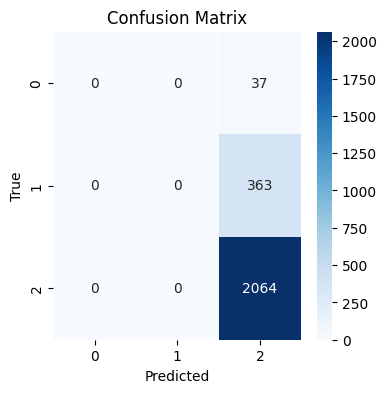

In [15]:
# 8. Evaluation 

y_pred = model.predict(X_test)

print("Classification report:\n")
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

Number_of_casualties                                                 0.036035
Number_of_vehicles_involved                                          0.022762
Types_of_Junction_No junction                                        0.010964
Light_conditions_Daylight                                            0.010899
Types_of_Junction_Y Shape                                            0.010681
Age_band_of_driver_31-50                                             0.010436
Work_of_casuality_Driver                                             0.010318
Vehicle_movement_Going straight                                      0.010100
Age_band_of_driver_18-30                                             0.010088
Lanes_or_Medians_Undivided Two way                                   0.009884
Lanes_or_Medians_Two-way (divided with broken lines road marking)    0.009847
Service_year_of_vehicle_nan                                          0.009829
Area_accident_occured_Other                                     

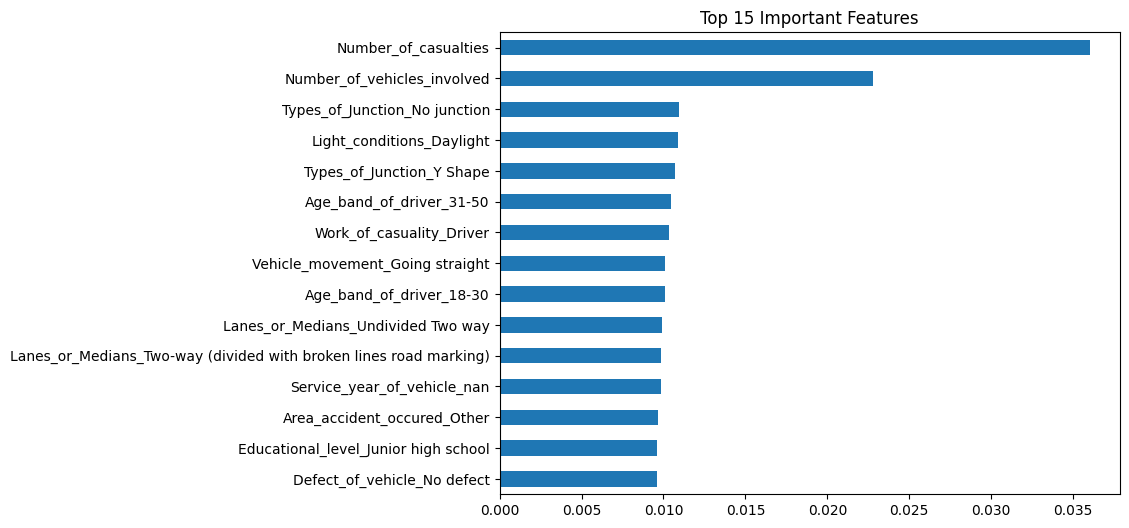

In [16]:
# 9. Feature importance (approximate – for tree-based model in a pipeline)

# Get feature names after OneHotEncoding
ohe = model.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, np.array(num_cols)])

importances = model.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

print(feat_imp.head(20))

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features')
plt.show()


In [17]:
# 10. (Optional) Export cleaned data for Power BI dashboard

df.to_csv("accidents_cleaned_for_dashboard.csv", index=False)


In [20]:
df.to_excel("accidents_cleaned_for_dashboard.xlsx", index=False)


C:\Users\Mrunali\AppData\Local\Temp\ipykernel_12448\1942457564.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel("accidents_cleaned_for_dashboard.xlsx", index=False)


In [21]:
import os
os.listdir()


[' Mrunali Pawar mid term lab code nlp.ipynb',
 '.android',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.docker',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.lesshst',
 '.matplotlib',
 '.Neo4jDesktop2',
 '.Rhistory',
 '.spyder-py3',
 '.ssh',
 '.VirtualBox',
 '.vscode',
 '06-11-24 ml theory confusion matrix .ipynb',
 '09-09-24 ml theory linear regression .ipynb',
 '10-09-24 + 13-09-24  ml theory+ lab housing data.ipynb',
 '12- 11-24 ml theory decsion tree .ipynb',
 '12-08-24 ml theory numpy pratice .ipynb',
 '13 - 03 -24 BA Mutilple linear regression.ipynb',
 '13-08-24 ml theory normalization and standarization .ipynb',
 '16-07-24 ML knowing python .ipynb',
 '16-09-24 ml theory lasso function.ipynb',
 '17-04-25 Adv python.ipynb',
 '19-11-24 decision tree .ipynb',
 '21-08-24 ml theory feathers .ipynb',
 '22-07-24  ML basic python question .ipynb',
 '22-10-24 ML theory .ipynb',
 '23-09-24 ml theory polynomial regression .ipynb',
